In [5]:
!pip install scikit-learn
!pip install tensorflow
!pip install pandas joblib matplotlib numpy

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Thư viện để lưu và tải mô hình
from sklearn.feature_extraction.text import TfidfVectorizer



# Hàm hiển thị ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def process(input, language):
    data = input
    print(data)
    # Visualization dữ liệu
    print("Visualization số lượng mẫu trong mỗi lớp của tập dữ liệu tiếng " + language + ' :')
    data['spam'].replace({0: 'ham', 1: 'spam'}, inplace=True)
    data['spam'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title('Số lượng mẫu trong mỗi lớp')
    plt.xlabel('Class')
    plt.ylabel('Số lượng')
    plt.show()

    # Downsampling để cân bằng
    print("Downsampling")
    ham_msg = data[data.spam == 'ham']
    spam_msg = data[data.spam == 'spam']
    ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)

    balanced_data = pd.concat([ham_msg, spam_msg], ignore_index=True)
    print(balanced_data)
    # Tiền xử lý dữ liệu
    print("Tiền xử lý dữ liệu")
    if language == "vi":
        balanced_data['text'] = balanced_data['text'].apply(lambda text: standard_vi(text))
    else:
        balanced_data['text'] = balanced_data['text'].apply(lambda text: standard_en(text))

    # Visualization số lượng từ trong mỗi email sau khi tiền xử lý
    print("Visualization số lượng từ trong mỗi email")
    word_counts = balanced_data['text'].apply(lambda x: len(x.split()))
    plt.hist(word_counts, bins=30, color='purple', edgecolor='black')
    plt.title('Số lượng từ trong mỗi email')
    plt.xlabel('Số từ')
    plt.ylabel('Số lượng email')
    plt.show()

    # Chia dữ liệu
    print("Chia dữ liệu")
    train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
                                                        balanced_data['spam'],
                                                        test_size=0.2,
                                                        random_state=42)

    # Sử dụng TF-IDF để chuyển đổi văn bản thành vector đặc trưng
    print("Chuyển đổi văn bản thành vector TF-IDF")
    vectorizer = TfidfVectorizer()
    train_X = vectorizer.fit_transform(train_X)
    test_X = vectorizer.transform(test_X)

    # Huấn luyện với SVM
    print("Huấn luyện SVM")
    model = SVC(kernel='linear', C=1, probability=True)
    model.fit(train_X, train_Y)

    # Lưu model và vectorizer
    joblib.dump(model, 'svm_model_' + language + '.joblib')
    joblib.dump(vectorizer, 'vectorizer_' + language + '.joblib')

    # Đánh giá
    print("Đánh giá")
    test_predictions = model.predict(test_X)
    test_accuracy = accuracy_score(test_Y, test_predictions)
    print('Test Accuracy :', test_accuracy)
    print(classification_report(test_Y, test_predictions))

    # Ma trận nhầm lẫn
    plot_confusion_matrix(test_Y, test_predictions, labels=['ham', 'spam'])

    return model, vectorizer

# Ví dụ chạy hàm process
# df = pd.read_csv('spam_data.csv')  # Thay bằng đường dẫn tới file dữ liệu của bạn
# model, vectorizer = process(df, 'vi')  # Hoặc 'en' nếu là tiếng Anh


Đọc dữ liệu
                                                    text  spam
0      Subject: naturally irresistible your corporate...     1
1      Subject: the stock trading gunslinger  fanny i...     1
2      Subject: unbelievable new homes made easy  im ...     1
3      Subject: 4 color printing special  request add...     1
4      Subject: do not have money , get software cds ...     1
...                                                  ...   ...
10892  Subject: put the 10 on the ft\r\nthe transport...     0
10893  Subject: 3 / 4 / 2000 and following noms\r\nhp...     0
10894  Subject: calpine daily gas nomination\r\n>\r\n...     0
10895  Subject: industrial worksheets for august 2000...     0
10896  Subject: important online banking alert\r\ndea...     1

[10897 rows x 2 columns]
Visualization số lượng mẫu trong mỗi lớp của tập dữ liệu tiếng en :


/tmp/ipykernel_30/2220258200.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['spam'].replace({0: 'ham', 1: 'spam'}, inplace=True)


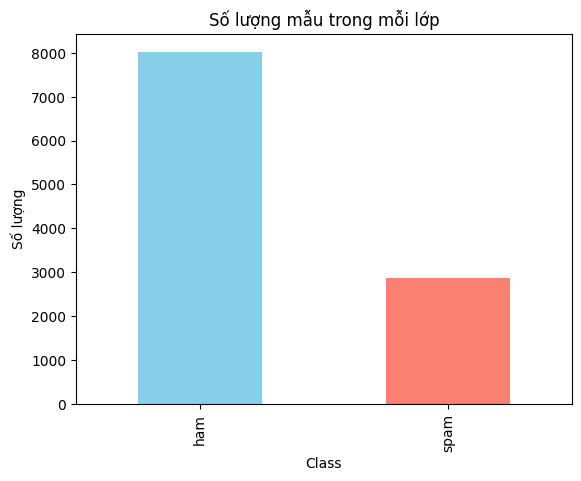

Downsampling
                                                   text  spam
0     Subject: prom dress shopping\r\nhi , just want...   ham
1     Subject: fyi\r\nfyi - just wanted to let every...   ham
2     Subject: weijun decided not to interview  i gu...   ham
3     Subject: urgent\r\ned has requested that we co...   ham
4     Subject: re : hello from vince kaminski at enr...   ham
...                                                 ...   ...
5729  Subject: pictures\r\nstreamlined denizen ajar ...  spam
5730  Subject: penny stocks are about timing\r\nnoma...  spam
5731  Subject: anomaly boys from 3881\r\nuosda apapr...  spam
5732  Subject: slutty milf wants to meet you\r\ntake...  spam
5733  Subject: important online banking alert\r\ndea...  spam

[5734 rows x 2 columns]
Tiền xử lý dữ liệu
Visualization số lượng từ trong mỗi email


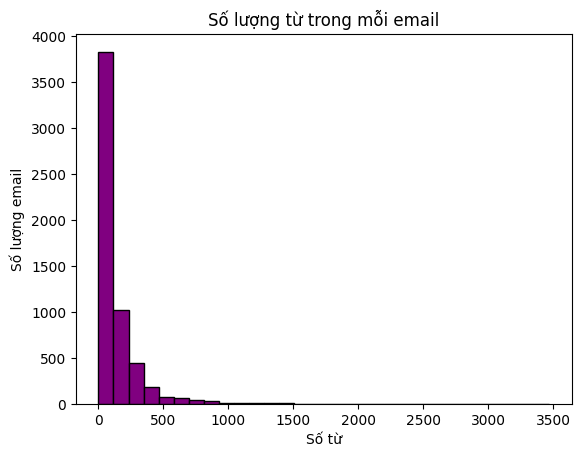

Chia dữ liệu
Chuyển đổi văn bản thành vector TF-IDF
Huấn luyện SVM
Đánh giá
Test Accuracy : 0.983435047951177
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       584
        spam       0.97      0.99      0.98       563

    accuracy                           0.98      1147
   macro avg       0.98      0.98      0.98      1147
weighted avg       0.98      0.98      0.98      1147



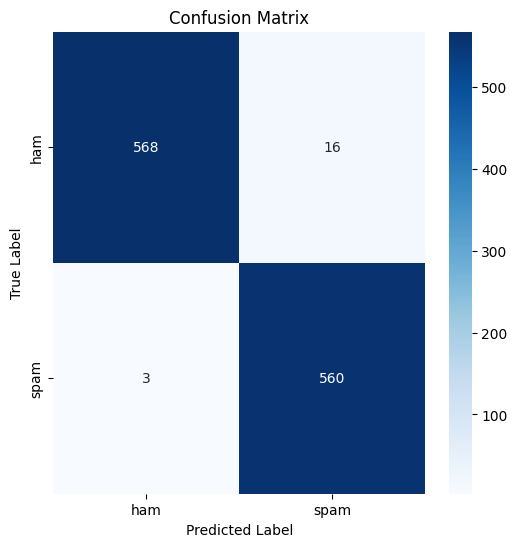

       spam                                               text
0       1.0  Chủ đề: tất nhiên không thể cưỡng lại được dan...
1       1.0  Chủ đề: tay súng giao dịch chứng khoán fanny r...
2       1.0  Chủ đề: những ngôi nhà mới đáng kinh ngạc được...
3       1.0  Chủ đề: In 4 màu yêu cầu thêm thông tin đặc bi...
4       1.0  Chủ đề: không có tiền , hãy lấy đĩa CD phần mề...
...     ...                                                ...
10896   0.0                            - hpl - tháng 9 . xls" 
10897   0.0  và 18.000 mmbtu/ngày vào thỏa thuận cartwheel ...
10898   0.0           - calpine daily gas nomination 1 . doc" 
10899   0.0  xin lỗi vì sự chậm trễ trong việc cung cấp cho...
10900   1.0                                                 " 

[10901 rows x 2 columns]
Visualization số lượng mẫu trong mỗi lớp của tập dữ liệu tiếng vi :


/tmp/ipykernel_30/2220258200.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['spam'].replace({0: 'ham', 1: 'spam'}, inplace=True)


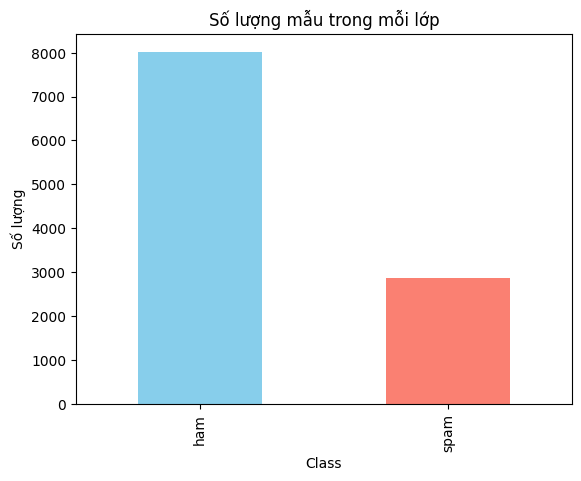

Downsampling
      spam                                               text
0      ham  Chủ đề: vị trí mới ( sam smith ) Norma , nhu c...
1      ham                                - hplno 419 . xls" 
2      ham          * ~ * ~ * ~ * ~ * ~ * * * ~ * * ~ * ~ *" 
3      ham  hãy cho tôi biết bạn nghĩ gì và tôi sẽ liên lạ...
4      ham  vui lòng gọi cho tôi nếu bạn có bất kỳ câu hỏi...
...    ...                                                ...
5727  spam                                                 " 
5728  spam                                                 " 
5729  spam                                macintoshchân chó" 
5730  spam                                                 " 
5731  spam                                                 " 

[5732 rows x 2 columns]
Tiền xử lý dữ liệu
Visualization số lượng từ trong mỗi email


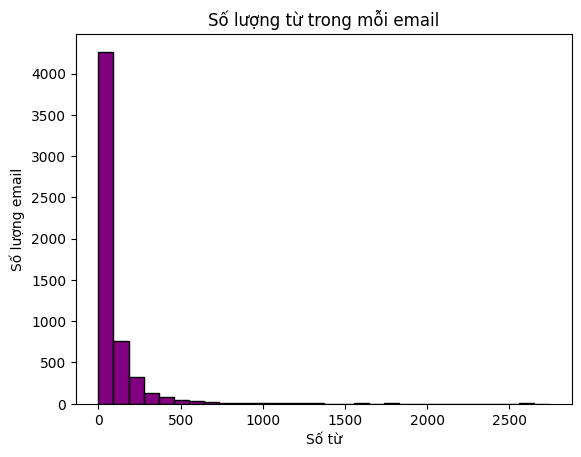

Chia dữ liệu
Chuyển đổi văn bản thành vector TF-IDF
Huấn luyện SVM
Đánh giá
Test Accuracy : 0.9102005231037489
              precision    recall  f1-score   support

         ham       0.99      0.84      0.91       598
        spam       0.85      0.99      0.91       549

    accuracy                           0.91      1147
   macro avg       0.92      0.91      0.91      1147
weighted avg       0.92      0.91      0.91      1147



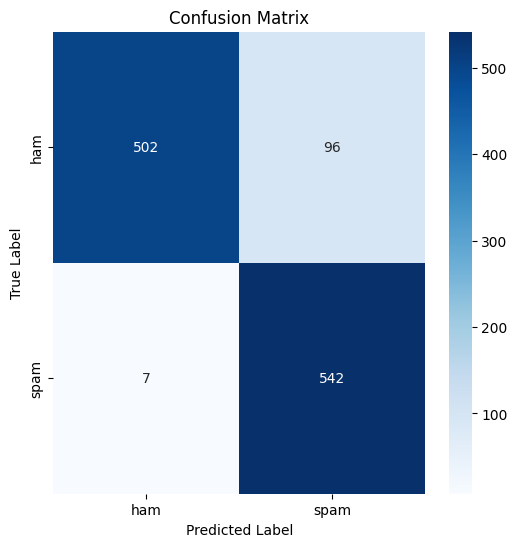

(SVC(C=1, kernel='linear', probability=True), TfidfVectorizer())

In [38]:
from flask import Flask, jsonify, render_template, request
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib

print("Đọc dữ liệu")
data_en = pd.read_csv('/kaggle/input/ennnnnnnnnnnnnnn/data_en.csv')
data_vi = pd.read_csv('/kaggle/input/viiiiiii2/data_vi.csv', encoding="utf-8")


# Huấn luyện mô hình svm cho 2 ngôn ngữ tiếng anh và tiếng việt
process(data_en, "en")
process(data_vi, "vi")